# Assignment1

1. Simple numpy exercises.
2. Implement K-nearest-neighbor with numpy.

If you are not sure about some api, search their document. E.g., NumPy manual https://numpy.org/doc/stable/

## 1.Simple Numpy Exercise

In [2]:
import numpy as np
np.random.seed(1)
#### 1. How to find the most frequent value in an array?
Z = np.random.randint(0,10,50)
print(Z)
########### less than two lines ###########
##### Hint: argmax, bincount ##############
answer = np.argmax(np.bincount(Z))
##### answer should be 9 ##################
###########################################
print(answer)


[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8
 7 3 6 5 1 9 3 4 8 1 4 0 3]
9


In [3]:
#### 2. Consider a small/medium/large vector Z, compute Z to the power of 3 using 3 different methods
#### search how to use np.einsum ####
np.random.seed(1)
x = np.random.rand(int(5e7))

print(np.einsum('i,i->i', x, np.einsum('i,i->i', x, x))) # solution A: np.einsum / from einops import einosum

print(np.power(x, 3)) # solution B: np.power()

print(x * x * x) # solution C

# even more ...

[7.25231927e-02 3.73752880e-01 1.49620548e-12 ... 6.07316907e-01
 4.38714198e-01 9.98950771e-01]
[7.25231927e-02 3.73752880e-01 1.49620548e-12 ... 6.07316907e-01
 4.38714198e-01 9.98950771e-01]
[7.25231927e-02 3.73752880e-01 1.49620548e-12 ... 6.07316907e-01
 4.38714198e-01 9.98950771e-01]


In [4]:
#### 3. Create random vector of size 10 and replace the maximum value by 0
np.random.seed(1)
Z = np.random.random(10)
# your solution in one line, hint: use argmax and indexing
answer = np.where(Z == Z[np.argmax(Z)], 0, Z)
print(answer)
# answer should be
#  [4.17022005e-01 0.00000000e+00 1.14374817e-04 3.02332573e-01
#  1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
#  3.96767474e-01 5.38816734e-01]

[4.17022005e-01 0.00000000e+00 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]


In [5]:
#### 4. Normalize a 5x5 random matrix
#### normalize: (x - μ) / σ
np.random.seed(1)
Z = np.random.random((5,5))
# your solution in one line, hint: use np.mean, np.std
answer = (Z - np.mean(Z)) / np.std(Z)
print(answer)
# answer should be: 
# [[-0.08166511  1.00240927 -1.57179097 -0.4915921  -1.04765972]
#  [-1.24215993 -0.906462   -0.33708451 -0.15405956  0.35365788]
#  [-0.07390005  0.87693577 -0.84143938  1.56639833 -1.47431007]
#  [ 0.82420869 -0.08065433  0.42468899 -1.07042386 -0.86413849]
#  [ 1.28984952  1.88859468 -0.45194809  0.90232398  1.56022104]]

[[-0.08166511  1.00240927 -1.57179097 -0.4915921  -1.04765972]
 [-1.24215993 -0.906462   -0.33708451 -0.15405956  0.35365788]
 [-0.07390005  0.87693577 -0.84143938  1.56639833 -1.47431007]
 [ 0.82420869 -0.08065433  0.42468899 -1.07042386 -0.86413849]
 [ 1.28984952  1.88859468 -0.45194809  0.90232398  1.56022104]]


## 3.Implement KNN with NumPy

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 设置 matplotlib 显示格式
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # 设置默认图像大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# CIFAR-10 数据集的下载和加载
transform = transforms.Compose(
    [transforms.ToTensor(),  # 转换为 Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]  # 归一化
)

# 从零开始下载数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [7]:
# CIFAR-10的分类标签
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_samples = 5

# 为每个类别获取10个样本
def get_samples_per_class(data, num_samples=10):
    samples = {cls: [] for cls in range(len(classes))}
    
    for img, label in zip(data.data, data.targets):
        if len(samples[label]) < num_samples:
            samples[label].append(img)
        # 当所有类都满足数量要求时，结束
        if all(len(samples[cls]) == num_samples for cls in samples):
            break
    
    return samples
    
# 获取每个类10个样本
samples = get_samples_per_class(trainset, num_samples)

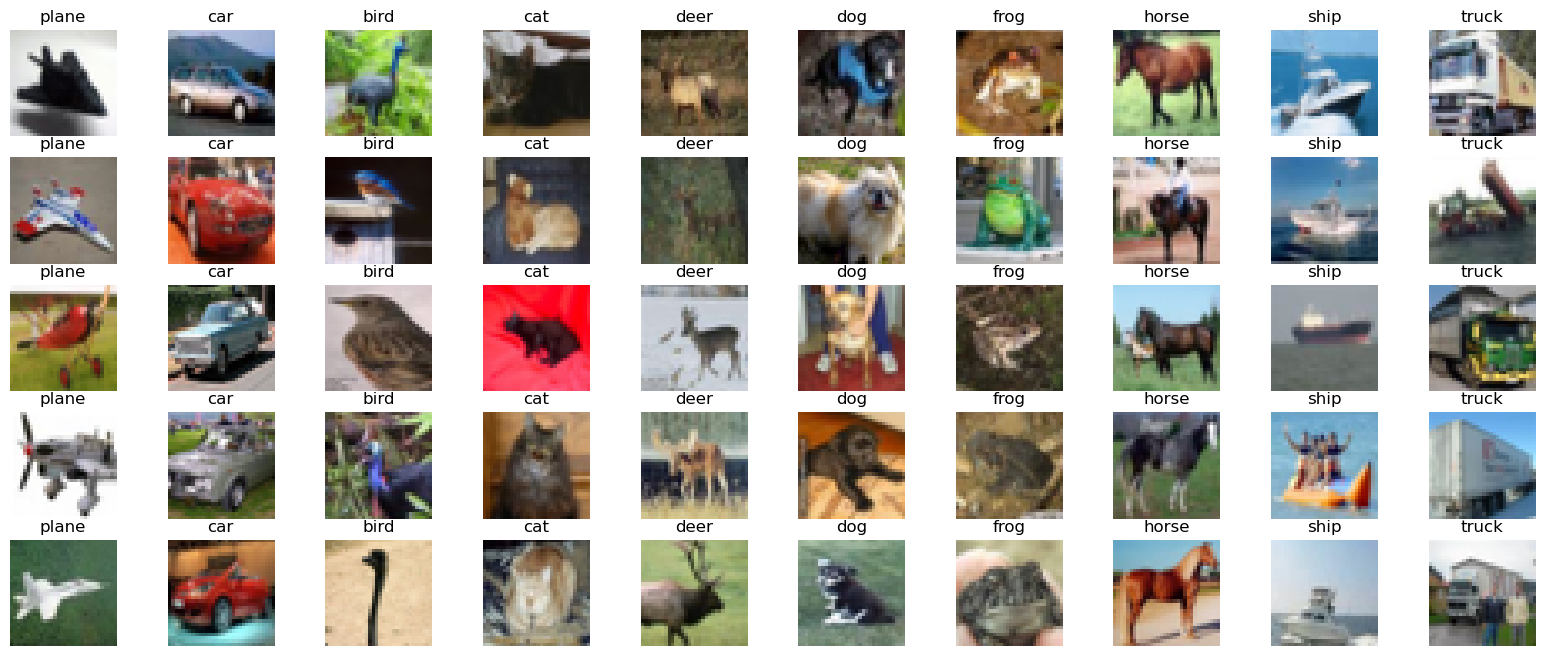

Training data shape: 50000
Test data shape: 10000


In [8]:
# 绘制N(类别数) x 10 的figure，标注label
def plot_samples(samples, num_classes=len(classes), samples_per_class=10):
    fig, axes = plt.subplots(samples_per_class, num_classes, figsize=(num_classes+10, samples_per_class+3))
    for i, (cls, imgs) in enumerate(samples.items()):
        for j, img in enumerate(imgs):
            ax = axes[j, i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(classes[cls])
    plt.show()
# 显示样本图像
plot_samples(samples, samples_per_class=num_samples)
# imshow(torchvision.utils.make_grid(images))
# # 打印标签
# print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 打印训练集和测试集的大小
print(f'Training data shape: {len(trainset)}')
print(f'Test data shape: {len(testset)}')

In [9]:
X_train, y_train = trainset.data[:5000], np.array(trainset.targets[:5000], dtype=int)
X_test, y_test = testset.data[:500], np.array(testset.targets[:500])
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
X_train = X_train / 256.
X_test = X_test / 256.

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between all test examples and all train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label.

Lets begin with computing the distance matrix between all training and test examples.

For example, if there are Ntr training examples and Nte test examples, this stage should result in a Nte x Ntr matrix where each element (i,j) is the distance between the i-th test and j-th train example.

**Note: For the three distance computations that we require you to implement in this notebook, you may not use the np.linalg.norm() function that numpy provides.**

First, open `k_nearest_neighbor.py` and implement the function compute_distances_two_loops/compute_distances_one_loops/compute_distances_no_loops **in one line**

In [11]:
from k_nearest_neighbor import KNearestNeighbor
# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    results = f(*args)
    toc = time.time()
    return toc - tic, results

no_loop_time, no_loop_results = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

one_loop_time, one_loop_results = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

two_loop_time, two_loop_results = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)
# You should see significantly faster performance with the fully vectorized implementation

difference1 = np.linalg.norm(no_loop_results - one_loop_results, ord='fro')
difference2 = np.linalg.norm(no_loop_results - two_loop_results, ord='fro')
difference3 = np.linalg.norm(one_loop_results - two_loop_results, ord='fro')
print(difference1, difference2, difference3)
# You should see exactly the same of these results, all 0

No loop version took 0.118941 seconds
One loop version took 38.033203 seconds
Two loop version took 24.720795 seconds
0.0 0.0 0.0


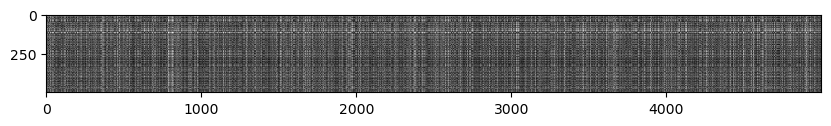

In [15]:
from k_nearest_neighbor import KNearestNeighbor
# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_test)
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

**Bonus question**: You can think what does this distance matrix means, why some rows or columns are visible brighter or darker? What's the behind true reason?

- Each element `d[i, j]` of the distance matrix is the L2 distance between the `i` th test data and the `j` th training data. A smaller distance indicates a higher similarity between the test data and the training data.
- The more similar a test point is to a training point, the brighter their corresponding pixel in the image is. Therefore, if certain test samples are close to specific training samples, those rows may be visible brighter, otherwise darker.

In [18]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)
num_test = len(y_test)
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

# you should see that accuracy of k == 5 is a little higher than k == 1

Got 137 / 500 correct => accuracy: 0.274000
Got 139 / 500 correct => accuracy: 0.278000


Other distance functions are also acceptable, e.g., L1 distance, L0 distance, Lp distance

If possible, see how does KNN behave on the whole dataset?